In [8]:
# ---------------------------------------------------
# CIFAR-10 HIGH ACCURACY CNN MODEL
# ---------------------------------------------------

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [9]:
# ---------------------------------------------------
# 1. Load & Normalize Data
# ---------------------------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

In [10]:
# ---------------------------------------------------
# 2. Data Augmentation
# ---------------------------------------------------
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

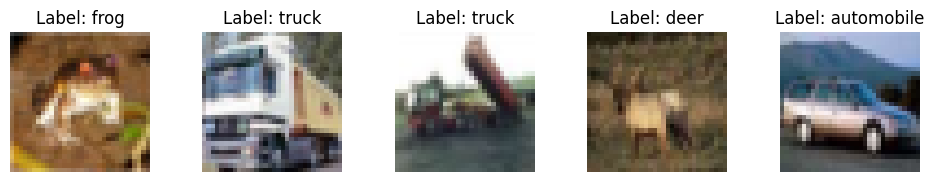

In [11]:
# Display a few sample images 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(12,4))
for i in range (5): 
    plt.subplot (2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {class_names[y_train[i][0]]}")
    plt.axis('off')
plt. show()

In [12]:
# ---------------------------------------------------
# 3. Define CNN Model (High Accuracy)
# ---------------------------------------------------
model = Sequential([
    # Block 1
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    # Dense layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [13]:
# ---------------------------------------------------
# 4. Compile Model
# ---------------------------------------------------
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),epochs=15, validation_data=(x_test, y_test))


Epoch 1/15


/Users/mayur/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 87ms/step - accuracy: 0.3334 - loss: 2.0961 - val_accuracy: 0.4891 - val_loss: 1.5348
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.5582 - loss: 1.2435 - val_accuracy: 0.6285 - val_loss: 1.0856
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.6299 - loss: 1.0393 - val_accuracy: 0.6662 - val_loss: 1.0168
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.6714 - loss: 0.9298 - val_accuracy: 0.6773 - val_loss: 0.9392
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7021 - loss: 0.8537 - val_accuracy: 0.7125 - val_loss: 0.8445
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7212 - loss: 0.8040 - val_accuracy: 0.7524 - val_loss: 0.7358
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7430 - loss: 0.7499 - val_accuracy: 0.7588 - val_loss: 0.7019
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7515 - loss: 0.7160 - val_a

In [15]:
# -----------------------------
# e) Evaluate the model
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8087 - loss: 0.5697
Test Accuracy: 0.8100000023841858


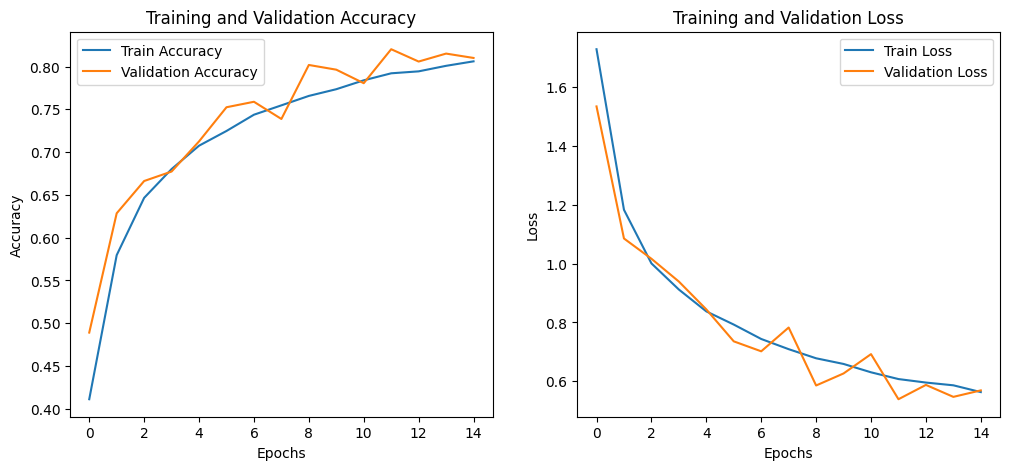

In [16]:
# Plot Training History
plt. figure(figsize=(12, 5))
# Accuracy
plt. subplot (1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt. title( 'Training and Validation Accuracy')
plt.xlabel ( 'Epochs')
plt.ylabel ( 'Accuracy')
plt.legend()
# Loss
plt. subplot (1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt. title( 'Training and Validation Loss')
plt.xlabel ('Epochs')
plt.ylabel( 'Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


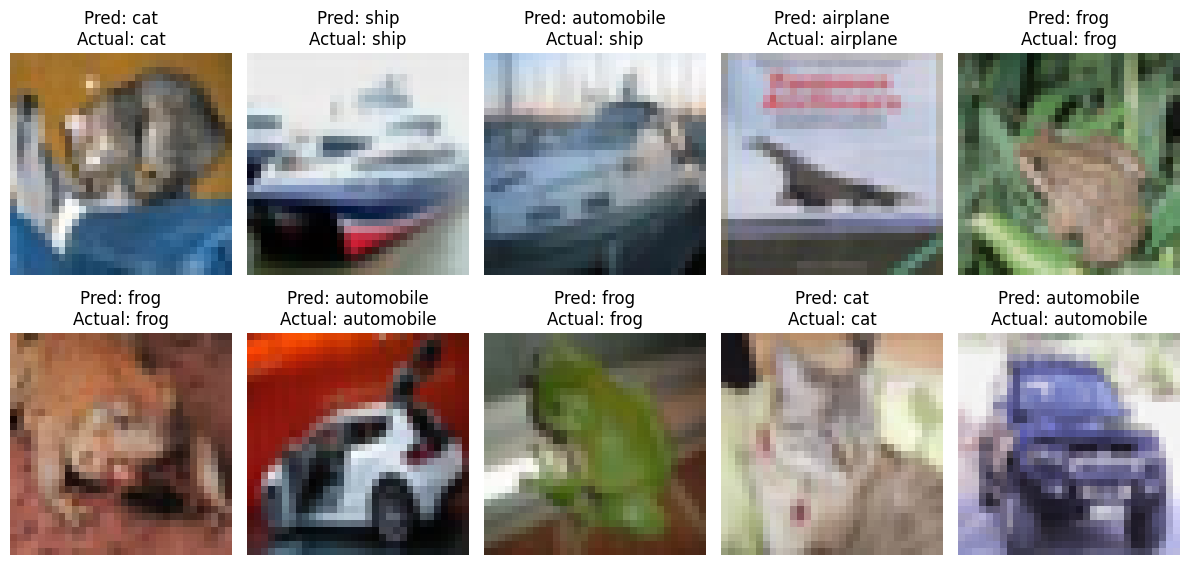

In [17]:
# ---------------------------------------------------
# 8. Make Predictions
# ---------------------------------------------------
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# ---------------------------------------------------
# 9. Show Prediction Results
# ---------------------------------------------------
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    actual = class_names[y_test[i][0]]
    pred = class_names[predicted_labels[i]]
    plt.title(f"Pred: {pred}\nActual: {actual}")
    plt.axis("off")

plt.tight_layout()
plt.show()